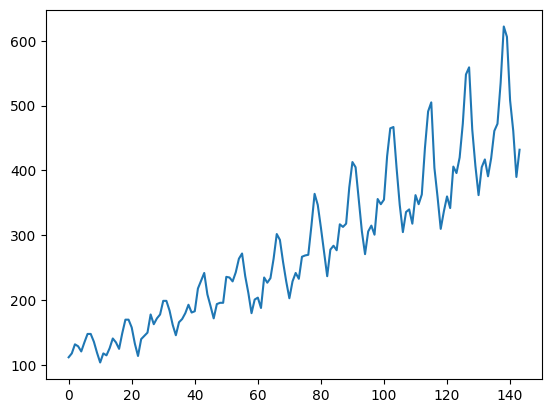

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('C:\\Users\\Chandana\\Desktop\\airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [7]:
# load the dataset
dataframe = pd.read_csv('C:\\Users\\Chandana\\Desktop\\airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [8]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

C:\Users\Chandana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 4s - 47ms/step - loss: 0.0335
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0150
Epoch 3/100
94/94 - 0s - 4ms/step - loss: 0.0114
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0102
Epoch 5/100
94/94 - 0s - 4ms/step - loss: 0.0092
Epoch 6/100
94/94 - 1s - 6ms/step - loss: 0.0082
Epoch 7/100
94/94 - 1s - 6ms/step - loss: 0.0073
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0064
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0056
Epoch 10/100
94/94 - 0s - 5ms/step - loss: 0.0049
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0042
Epoch 12/100
94/94 - 0s - 4ms/step - loss: 0.0037
Epoch 13/100
94/94 - 0s - 4ms/step - loss: 0.0032
Epoch 14/100
94/94 - 0s - 5ms/step - loss: 0.0029
Epoch 15/100
94/94 - 1s - 5ms/step - loss: 0.0026
Epoch 16/100
94/94 - 0s - 5ms/step - loss: 0.0024
Epoch 17/100
94/94 - 1s - 6ms/step - loss: 0.0023
Epoch 18/100
94/94 - 1s - 5ms/step - loss: 0.0022
Epoch 19/100
94/94 - 1s - 6ms/step - loss: 0.0021
Epoch 20/100
94/94 - 1s - 5ms/step - loss: 0.0021
Epoch 21

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Train Score: 22.80 RMSE
Test Score: 49.39 RMSE


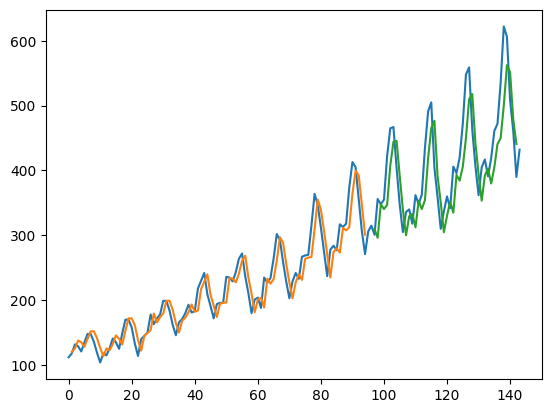

In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()